[5.263157894736842, 25.64102564102564, 16.94915254237288, 12.658227848101266, 13.131313131313133, 15.966386554621847, 13.66906474820144, 14.465408805031446, 12.849162011173185, 15.07537688442211, 13.24200913242009, 15.899581589958158, 10.038610038610038, 11.11111111111111, 14.046822742474916, 10.344827586206897, 10.32448377581121, 13.09192200557103, 10.817941952506596, 15.789473684210526, 10.26252983293556, 15.717539863325742, 12.854030501089325, 11.691022964509393, 15.430861723446892, 13.680154142581888, 10.946196660482375, 11.091234347048301, 12.780656303972366, 13.689482470784641, 12.116316639741518]
[26.31578947368421, 35.8974358974359, 33.89830508474576, 34.177215189873415, 37.37373737373738, 31.092436974789916, 33.093525179856115, 31.446540880503143, 27.37430167597765, 31.155778894472363, 31.963470319634702, 30.543933054393307, 32.432432432432435, 32.97491039426524, 31.77257525083612, 30.721003134796238, 35.39823008849557, 31.47632311977716, 31.13456464379947, 29.82456140350877, 

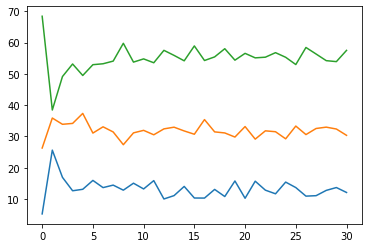

3
[('T', 356), ('H', 188), ('C', 75)]
[('T', 356), ('H', 188), ('C', 75)]
[('T', 356), ('CH', 263)]
C: 00
H: 01
T: 1


In [4]:
import numpy as np
import random as rm
import sys
import matplotlib.pyplot as plt

# The statespace
states = ["Chabudai","Husuma","TV"]

transitionName = [["CC","CT","CH"],["HH","HT","HC"],["TT","TH","TC"]]
transitionMatrix = [[0.2,0.5,0.3],[0.1,0.6,0.3],[0.5,0.5,0.0]]

alist = []

def generate_sequence(days, cPos):
    # Choose the starting state
    currentPosition = cPos
    alist.append(currentPosition)
    #print("Start state: " + currentPosition)
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    activityList = [currentPosition]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != days:
        if currentPosition == "Chabudai":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "CC":
                prob = prob * 0.2
                activityList.append("Chabudai")
                alist.append("Chabudai")
                pass
            elif change == "CT":
                prob = prob * 0.5
                currentPosition = "TV"
                activityList.append("TV")
                alist.append("TV")
            else:
                prob = prob * 0.3
                currentPosition = "Husuma"
                activityList.append("Husuma")
                alist.append("Husuma")
                
        elif currentPosition == "Husuma":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "HC":
                prob = prob * 0.3
                activityList.append("Chabudai")
                alist.append("Chabudai")
                pass
            elif change == "HT":
                prob = prob * 0.6
                currentPosition = "TV"
                activityList.append("TV")
                alist.append("TV")
            else:
                prob = prob * 0.1
                currentPosition = "Husuma"
                activityList.append("Husuma")
                alist.append("Husuma")
                
        elif currentPosition == "TV":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "TC":
                prob = prob * 0.0
                activityList.append("Chabudai")
                alist.append("Chabudai")
                pass
            elif change == "TH":
                prob = prob * 0.3
                currentPosition = "Husuma"
                activityList.append("Husuma")
                alist.append("Husuma")
            else:
                prob = prob * 0.5
                currentPosition = "TV"
                activityList.append("TV")
                alist.append("TV")
        i += 1  


#args = sys.argv
startPosition="TV"

LENGTH = 621
counter = 0

TV_seq = []
Chabudai_seq = []
Husuma_seq = []

TV_str = []
Chabudai_str = []
Husuma_str = []

for i in range(1,LENGTH,2):
    LEN = i - 1
    alist = []
    
    generate_sequence(LEN, startPosition)

    counter = counter + 1
    
    if counter % 10 == 0:
        sum = alist.count('Chabudai') + alist.count('Husuma') + alist.count('TV') 
        Chabudai_seq.append((alist.count('Chabudai'))/sum*100)
        Husuma_seq.append((alist.count('Husuma'))/sum*100)
        TV_seq.append((alist.count('TV'))/sum*100)
    
    rstring = '' 
    for i in alist:
        rstring = rstring + i[0]
    #print(rstring)
            

print(Chabudai_seq)
print(Husuma_seq)
print(TV_seq)

plt.plot(Chabudai_seq)
plt.plot(Husuma_seq)
plt.plot(TV_seq)
plt.show()

from collections import Counter

def MIN_PRIORITY_QUEUE(S):
    return sorted(S.items(), key=lambda x: x[1], reverse=True)

def EXTRACT_MIN(Q):
    return Q.pop()

def INSERT(Q, z):
    return Q.append(z)

def HUFFMAN(S, a):
    n = len(S)
    Q = MIN_PRIORITY_QUEUE(S)
    print(n)
    print(Q)
    for i in range(n - 1):
        print(Q)
        left = EXTRACT_MIN(Q)
        right = EXTRACT_MIN(Q)
        #print(left)
        #print(right)
        freq = left[1] + right[1]
        z = (left[0] + right[0], freq)
        INSERT(Q, z)
        #print("left:")
        #print(left)
        #print("right:")
        #print(right)
        a.append([left, "0", left[0] + right[0]])
        a.append([right, "1", left[0] + right[0]])
        Q = dict(zip([i[0] for i in Q], [i[1] for i in Q]))
        Q = MIN_PRIORITY_QUEUE(Q)
    a.append([EXTRACT_MIN(Q), "", "top"])
    return a

def PrintReslut(b):
    for i in range(len(a)):
        now = a[i][0][0]
        num = a[i][1]
        j = 0
        while a[j][2] != 'top':
            if a[i][2] == a[j][0][0]:
                num = a[j][1] + num
                i = j
                flag = 0
                for k in range(len(a)):
                    if a[k][0][0] == 'top' or a[j][2] == a[k][0][0]:
                        flag = 1
                        break
            else:
                j += 1
        if now in s:
            b.append([now, num])
    return b

def DivideS(S):
    S = list(S)
    S = Counter(S)
    S = dict(S)
    return S

str=rstring

s = DivideS(str)
a = HUFFMAN(s, [])
for b in sorted(PrintReslut([])):
    print(b[0] + ": " + b[1])
